
# Multi Layer Perceptron  using Tensorflow 2.0
****
<img src="images/DL_Tensorflow.png" alt="Drawing"  />
<p style="text-align: center;font-weight: bold;color:#FF8000;font-size:20px;font-family:ubuntu;">“ Zakarya Rouzki ” <br>Deep Learning <br><br></p><p style="text-align: center;font-weight: bold">mail : zakaryarouzki@gmail.com<br>LinkedIn : <a href="https://www.linkedin.com/in/zack404"> https://www.linkedin.com/in/zack404 <a></p>

<hr style="border-top: 2px solid #FF8000;">
<h1 style="text-align: center;font-weight: bold;color:#FF8000;text-decoration: underline;">Plan</h1> 
<a href="#minst"><h2 style="color:#425066" > I - MINST DataSet  </h2></a>
<a href="#Load_Data"><h2 style="color:#425066"> II - Loading the DataSet  </h2></a>
<a href="#MLP"><h2 style="color:#425066"> III - MLP: Multi-Layer Perceptron and Implementation  </h2></a>
<a href="#MLP_1"><h4 style="color:#8A1DEC;text-indent: 30px;"> III.1 - Definition of MLP   </h4><a/>
<a href="#MLP_2"><h4 style="color:#8A1DEC;text-indent: 30px;"> III.2 - Building the model   </h4></a>
<a href="#MLP_3"><h4 style="color:#8A1DEC;text-indent: 30px;"> III.3 - Training the model   </h4></a>
<a href="#MLP_4"><h4 style="color:#8A1DEC;text-indent: 30px;"> III.4 - Making Predictions   </h4></a>
<hr style="border-top: 2px solid #FF8000;">

In [1]:
# import TensorFlow and Keras. 
import tensorflow as tf
from tensorflow import keras

# import other necessary package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

checking TensorFlow and Keras Version :

In [8]:
tf.__version__

'2.0.0'

In [9]:
keras.__version__

'2.2.4-tf'

<a id="minst"></a>
<h1 style="color:#425066"> I - MINST DataSet : </h1>

The original MNIST dataset contains a lot of handwritten digits. 
People from AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on.

<p style="color:#FF8000;font-size:18px;font-family:Ubuntu;" ><b>“ If it doesn’t work on MNIST, it won’t work at all ”</b><br>“ Well, if it does work on MNIST, it may still fail on others. ”</p>

Fashion MNIST is a dataset that is consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes :
* The images represent fashion items .
* 70,000 grayscale images of 28×28 pixels each, with 10 classes. 
* Every image is represented as a 28×28 array
* The pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0)

<img src="images/fashion-mnist-sprite.png" width="600" height="1000" alt="Drawing"  />

<a id="Load_Data"></a>
<h1 style="color:#425066"> II - Loading the DataSet : </h1>

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets :

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Each pixel intensity is represented as a byte (0 to 255):

In [13]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. <br>
We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

We can plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

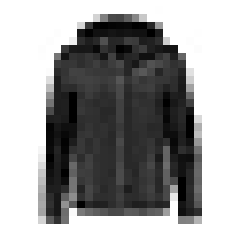

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9 :

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents a coat

In [18]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [19]:
X_valid.shape

(5000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

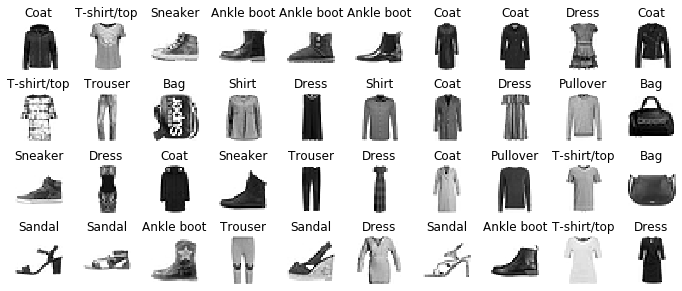

In [21]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<a id="MLP"></a>
<h1 style="color:#425066"> III - MLP: Multi-Layer Perceptron and Implementation : </h1>

<a id="MLP_1"></a>
<h3 style="color:#8A1DEC"> III.1 - Definition of MLP  : </h3>

<img src="images/mlp.gif" style="border-radius:30%" width="500" height="1000" alt="Drawing"  />

An <b> MLP </b> is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer . The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

<a id="MLP_2"></a>
<h3 style="color:#8A1DEC"> III.2 - Building the model  : </h3>

Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [22]:
#create a Sequential model
model = keras.models.Sequential()

#build the first layer and add it to the model. It is a Flatten layer 
model.add(keras.layers.Flatten(input_shape=[28, 28]))

#add a two Dense hidden layer with 300 neurons and 100 neurons each one. with activation method relu
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

#add a Dense output layer with 10 neurons 
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
 model.layers

In [24]:
#displays all the model’s layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


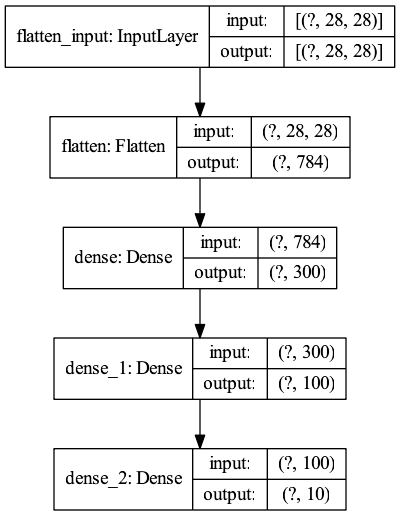

In [25]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [26]:
model.layers[1].name

'dense'

In [31]:
model.get_layer('dense_2').name

'dense_2'

In [32]:
hidden1 = model.layers[1]

Accessing to the parameters of a layer :

In [33]:
weights, biases = hidden1.get_weights()

In [55]:
weights

array([[ 0.05586179,  0.07023463, -0.05106905, ...,  0.07327729,
        -0.04229341,  0.0021897 ],
       [ 0.04657055, -0.06356616,  0.0391226 , ..., -0.04588197,
         0.01672724,  0.05449578],
       [ 0.00584704, -0.0055614 ,  0.06061418, ...,  0.01507805,
        -0.02056137,  0.00195678],
       ...,
       [ 0.00964922,  0.03654177,  0.02345799, ..., -0.00863209,
         0.01839127,  0.07007065],
       [-0.05634413,  0.05513473, -0.03702832, ..., -0.05412579,
         0.05179633,  0.05640528],
       [ 0.06884225,  0.03250696,  0.00118833, ..., -0.05366082,
        -0.0381405 , -0.04197863]], dtype=float32)

In [57]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

<a id="MLP_3"></a>
<h3 style="color:#8A1DEC"> III.3 - Training the model  : </h3>

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.6978 - accuracy: 0.7684 - val_loss: 0.5211 - val_accuracy: 0.8214
Epoch 2/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.4849 - accuracy: 0.8300 - val_loss: 0.4480 - val_accuracy: 0.8504
Epoch 3/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4402 - accuracy: 0.8453 - val_loss: 0.4166 - val_accuracy: 0.8576
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.4133 - accuracy: 0.8551 - val_loss: 0.4095 - val_accuracy: 0.8588
Epoch 5/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3935 - accuracy: 0.8613 - val_loss: 0.3979 - val_accuracy: 0.8620
Epoch 6/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.3774 - accuracy: 0.8669 - val_loss: 0.3944 - val_accuracy: 0.8582
Epoch 7/30
55000/55000 [==============================] 

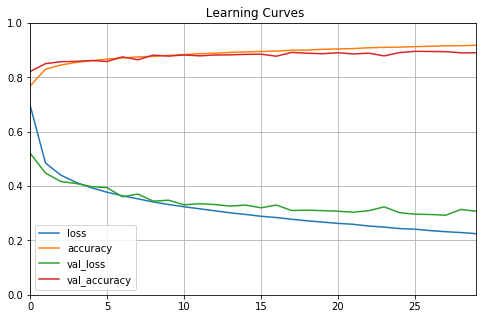

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title(" Learning Curves")
plt.show()

In [39]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[66.65393710789681, 0.8472]

<a id="MLP_4"></a>
<h3 style="color:#8A1DEC"> III.4 - Making Predictions  : </h3>

using the first 3 images on the test to predict class :

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

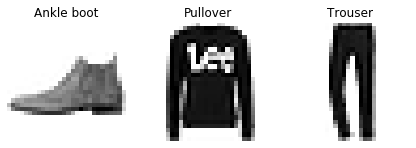

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<p style="text-align: right; color: red; font-size: 185.7%; font-weight: bold;">./Done  <p>
<p style="text-align:right"> Thanks :) </p>